In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_prescripcion_22=pd.read_csv('PRESCRIPCIONES DIABETES FECHA FINAL.csv')

C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_37532\3055374261.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_prescripcion_22=pd.read_csv('PRESCRIPCIONES DIABETES FECHA FINAL.csv')


`Total de pacientes:`

In [61]:
len(set(df_prescripcion_22['NSS_AM']))

3284135

`Pacientes con medicamentos Anti-Diabéticos`

In [63]:
len(set(df_prescripcion_22[df_prescripcion_22['TOTAL DE MEDICAMIENTOS']!=0]['NSS_AM']))

2836228

Verificación: `2836228`

In [628]:
3284135-2836228

447907

In [3]:
df_prescripcion_22['FECHA_CONSULTA']=pd.to_datetime(df_prescripcion_22['FECHA_CONSULTA'])
df_prescripcion_22['MES']=df_prescripcion_22['FECHA_CONSULTA'].dt.month

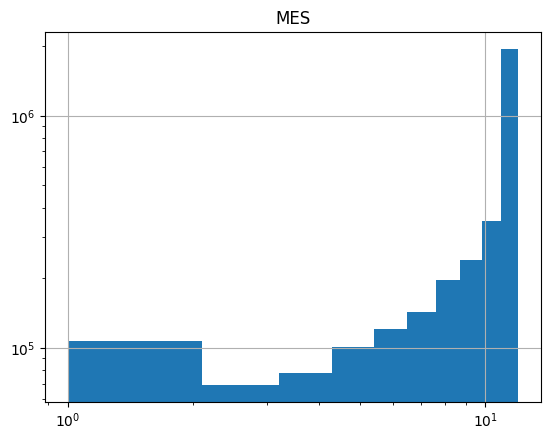

In [55]:
df_prescripcion_22.hist(['MES'])
plt.xscale('log')
plt.yscale('log')

In [6]:
df_prescripcion_edo_22=df_prescripcion_22.copy()#[df_prescripcion_22['OOAD']=='Aguascalientes']

### ADJENCENCY MATRIX

In [7]:
df_prescripcion_adjencency_matrix_all_22=df_prescripcion_edo_22.iloc[:,4:-2]

In [8]:
df_prescripcion_adjencency_matrix_all_22.head()

,010.000.5700.00.00,010.000.5701.00.00,010.000.5702.00.00,010.000.5703.00.00,010.000.5703.01.00,010.000.5704.00.00,010.000.5705.00.00,010.000.5740.00.00,010.000.5741.00.00,010.000.5742.00.00,...,010.000.6008.00.00,010.000.6009.00.00,010.000.6123.00.00,010.000.6181.00.00,010.000.6275.00.00,010.000.6316.00.00,010.000.6337.00.00,010.000.6337.01.00,010.000.6339.00.00,TOTAL DE MEDICAMIENTOS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
df_prescripcion_adjencency_matrix_all_22.shape

(3338077, 55)

In [14]:
df_prescripcion_adjencency_matrix_all_22=df_prescripcion_adjencency_matrix_all_22[df_prescripcion_adjencency_matrix_all_22['TOTAL DE MEDICAMIENTOS']!=0]

In [15]:
df_prescripcion_adjencency_matrix_all_22[df_prescripcion_adjencency_matrix_all_22.duplicated()].shape

(2870373, 55)

In [16]:
df_prescripcion_adjencency_matrix_all_22[~df_prescripcion_adjencency_matrix_all_22.duplicated()].shape

(2496, 55)

In [140]:
df_prescripcion_adjencency_matrix_all_22.shape

(2872869, 55)

In [615]:
df_prescripcion_melt_22=df_prescripcion_edo_22.melt(id_vars=['CVE_PRESUPUESTAL','NSS_AM'],value_vars=df_prescripcion_edo_22.columns[4:-3])

df_prescripcion_melt_22.rename(columns={'variable':'CVE_MEDICAMENTO'},inplace=True)

print(df_prescripcion_melt_22.value.sum())

4792874.0


In [24]:
df_prescripcion_edo_22['TOTAL DE MEDICAMIENTOS'].sum()

4792874.0

### Importar catalogo de medicamentos DM 

In [18]:
df_catalogo_med_DM=pd.read_excel('Catalogo global de medicamentos DM.xlsx')

In [19]:
df_catalogo_med_DM.head()

,CVE_MEDICAMENTO,Sustancias,TIPO
0,010.000.5700.00.00,VILDAGLIPTINA METFORMINA. COMPRIMIDO CADA COMP...,INHIBIDOR DPP4/BIGUANIDA
1,010.000.5701.00.00,VILDAGLIPTINA METFORMINA. COMPRIMIDO CADA COMP...,INHIBIDOR DPP4/BIGUANIDA
2,010.000.5702.00.00,VILDAGLIPTINA METFORMINA. COMPRIMIDO CADA COMP...,INHIBIDOR DPP4/BIGUANIDA
3,010.000.5703.00.00,SITAGLIPTINA METFORMINA. COMPRIMIDO CADA COMPR...,INHIBIDOR DPP4/BIGUANIDA
4,010.000.5703.01.00,SITAGLIPTINA METFORMINA. COMPRIMIDO CADA COMPR...,INHIBIDOR DPP4/BIGUANIDA


`freq. familias de farmacos en el catálogo de med de DM.`

In [22]:
df_catalogo_med_DM.value_counts(['TIPO'])

TIPO                                   
INHIBIDOR DPP4/BIGUANIDA                   11
INSULINA BASAL                              9
INHIBIDOR DPP4                              6
SGLT2                                       4
BIGUANIDA                                   3
BIGUANIDA/SULFONILUREAS                     3
INSULINA BOLO                               3
SGLT2/BIGUANIDA                             3
SULFONILUREA                                3
GLITAZONA-TIAZOLINDIONAS                    2
GLP-1                                       2
INSULINA MEZCLA                             2
INHIBIDOR DE ALFA GLUCOSIDASA               1
INHIBIDOR DPP4/GLITAZONA-TIAZOLINDIONAS     1
MIMETICOS DE INCRETINA                      1
dtype: int64

`total de med.`

### PIVOT TO MELT

#### Merge: Tab_Melt vs Catalogo de medicamentos DM, para obtener la familia del farmaco.

In [35]:
df_prescripcion_efectiva_melt_22=df_prescripcion_melt_22[df_prescripcion_melt_22.value!=0]

In [36]:
df_prescripcion_melt_merge_22=df_prescripcion_efectiva_melt_22.merge(df_catalogo_med_DM[['CVE_MEDICAMENTO','TIPO']], on='CVE_MEDICAMENTO')

In [622]:
df_prescripcion_melt_merge_22.columns

Index(['CVE_PRESUPUESTAL', 'NSS_AM', 'CVE_MEDICAMENTO', 'value', 'TIPO'], dtype='object')

### Conjuntos de medicamentos por familia y por paciente

In [625]:
#df_prescripcion_melt_merge_22['CONJUNTO DE MEDICAMENTOS']=df_prescripcion_melt_merge_22.groupby(['CVE_PRESUPUESTAL','NSS_AM','TIPO'])['CVE_MEDICAMENTO'].apply(set).to_dict()

In [621]:
df_prescripcion_melt_merge_22.groupby(['TIPO'])['CVE_MEDICAMENTO'].apply(set).to_dict()

{'BIGUANIDA': {'010.000.5165.00.00',
  '010.000.6275.00.00',
  '010.000.6339.00.00'},
 'BIGUANIDA/SULFONILUREAS': {'010.000.6273.00.00',
  '010.000.6274.00.00',
  '010.000.6340.00.00'},
 'GLITAZONA-TIAZOLINDIONAS': {'010.000.4149.00.00', '010.000.4150.01.00'},
 'GLP-1': {'010.000.5744.00.00'},
 'INHIBIDOR DE ALFA GLUCOSIDASA': {'010.000.5166.00.00'},
 'INHIBIDOR DPP4': {'010.000.4152.00.00',
  '010.000.4152.01.00',
  '010.000.4153.00.00',
  '010.000.5620.00.00',
  '010.000.5621.00.00',
  '010.000.6123.00.00'},
 'INHIBIDOR DPP4/BIGUANIDA': {'010.000.5700.00.00',
  '010.000.5701.00.00',
  '010.000.5702.00.00',
  '010.000.5703.00.00',
  '010.000.5703.01.00',
  '010.000.5704.00.00',
  '010.000.5705.00.00',
  '010.000.5740.00.00',
  '010.000.5741.00.00',
  '010.000.5742.00.00',
  '010.000.6180.00.00'},
 'INHIBIDOR DPP4/GLITAZONA-TIAZOLINDIONAS': {'010.000.6181.00.00'},
 'INSULINA BASAL': {'010.000.1050.00.02',
  '010.000.1050.01.02',
  '010.000.4156.00.00',
  '010.000.4157.00.02',
  '010.00

In [64]:
df_prescripcion_melt_merge_22.head()

,CVE_PRESUPUESTAL,NSS_AM,CVE_MEDICAMENTO,value,TIPO
0,220212252110,4804490103F1949,010.000.5700.00.00,1.0,INHIBIDOR DPP4/BIGUANIDA
1,224201252110,6582401178M1940,010.000.5700.00.00,1.0,INHIBIDOR DPP4/BIGUANIDA
2,271607252110,1715928714M1961,010.000.5700.00.00,1.0,INHIBIDOR DPP4/BIGUANIDA
3,271607252110,2484580475F1959,010.000.5700.00.00,1.0,INHIBIDOR DPP4/BIGUANIDA
4,153005252110,6897814277F1957,010.000.5701.00.00,1.0,INHIBIDOR DPP4/BIGUANIDA


In [38]:
df_prescripcion_melt_merge_22[df_prescripcion_melt_merge_22.duplicated()].shape

(6131, 5)

`freq. prescripciones de familias de farmac.`

In [613]:
df_prescripcion_melt_merge_22[df_prescripcion_melt_merge_22.value!=0].value_counts('TIPO',normalize=True)*100

TIPO
BIGUANIDA                                  39.692802
INSULINA BASAL                             18.599738
SULFONILUREA                                9.970677
INHIBIDOR DPP4/BIGUANIDA                    9.908064
INHIBIDOR DPP4                              7.333721
SGLT2                                       6.346276
GLITAZONA-TIAZOLINDIONAS                    4.101339
INSULINA BOLO                               2.138112
INSULINA MEZCLA                             1.227990
INHIBIDOR DE ALFA GLUCOSIDASA               0.680489
BIGUANIDA/SULFONILUREAS                     0.000396
SGLT2/BIGUANIDA                             0.000334
GLP-1                                       0.000042
INHIBIDOR DPP4/GLITAZONA-TIAZOLINDIONAS     0.000021
dtype: float64

In [40]:
df_prescripcion_melt_merge_22.shape

(4792874, 5)

#### datos limpios con segunda verificación de prescripción

In [41]:
df_prescripcion_melt_merge_otorgadas_22=df_prescripcion_melt_merge_22[df_prescripcion_melt_merge_22.value!=0]

In [42]:
df_prescripcion_melt_merge_otorgadas_22.shape

(4792874, 5)

In [65]:
df_prescripcion_melt_merge_otorgadas_22.head()

,CVE_PRESUPUESTAL,NSS_AM,CVE_MEDICAMENTO,value,TIPO
0,220212252110,4804490103F1949,010.000.5700.00.00,1.0,INHIBIDOR DPP4/BIGUANIDA
1,224201252110,6582401178M1940,010.000.5700.00.00,1.0,INHIBIDOR DPP4/BIGUANIDA
2,271607252110,1715928714M1961,010.000.5700.00.00,1.0,INHIBIDOR DPP4/BIGUANIDA
3,271607252110,2484580475F1959,010.000.5700.00.00,1.0,INHIBIDOR DPP4/BIGUANIDA
4,153005252110,6897814277F1957,010.000.5701.00.00,1.0,INHIBIDOR DPP4/BIGUANIDA


In [47]:
df_prescripcion_melt_merge_groupby_22=df_prescripcion_melt_merge_otorgadas_22.groupby(['CVE_PRESUPUESTAL','NSS_AM','TIPO']).agg({'value':'sum'}).reset_index()

`pacientes que tienen dos veces la misma familia.`

In [626]:
df_prescripcion_melt_merge_groupby_22[df_prescripcion_melt_merge_groupby_22['value']!=1]

,CVE_PRESUPUESTAL,NSS_AM,TIPO,value
69,10106252110,1109650071M1965,INHIBIDOR DPP4,2.0
301,10106252110,1287687283F1968,INHIBIDOR DPP4,2.0
764,10106252110,177420909M1947,INHIBIDOR DPP4/BIGUANIDA,2.0
1280,10106252110,3095690190M1969,INHIBIDOR DPP4/BIGUANIDA,2.0
6744,10106252110,5180550492F1959,INHIBIDOR DPP4,2.0
...,...,...,...,...
4772502,80102252110,3592748722F1976,SGLT2,2.0
4772532,80102252110,3592766623F1982,INSULINA BASAL,2.0
4772798,80102252110,3599833336F1983,INSULINA BASAL,2.0
4773009,80102252110,4398540335F1963,INHIBIDOR DPP4,2.0


In [627]:
len(set(df_prescripcion_melt_merge_groupby_22['NSS_AM']))

2836228

### Tabla codificada por familias de farmacos

In [50]:
df_prescripcion_melt_merge_groupby_pivot_22=pd.pivot(df_prescripcion_melt_merge_groupby_22,index=['CVE_PRESUPUESTAL','NSS_AM'], columns='TIPO', values='value')

In [52]:
df_prescripcion_melt_merge_groupby_pivot_22.reset_index(inplace=True)

In [53]:
df_prescripcion_melt_merge_groupby_pivot_22.fillna(0,inplace=True)

In [56]:
df_prescripcion_melt_merge_groupby_pivot_22.head()

TIPO,CVE_PRESUPUESTAL,NSS_AM,BIGUANIDA,BIGUANIDA/SULFONILUREAS,GLITAZONA-TIAZOLINDIONAS,GLP-1,INHIBIDOR DE ALFA GLUCOSIDASA,INHIBIDOR DPP4,INHIBIDOR DPP4/BIGUANIDA,INHIBIDOR DPP4/GLITAZONA-TIAZOLINDIONAS,INSULINA BASAL,INSULINA BOLO,INSULINA MEZCLA,SGLT2,SGLT2/BIGUANIDA,SULFONILUREA
0,10106252110,1014984179F1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,10106252110,1016902774F1952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10106252110,1016959947M1966,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10106252110,1017955781M1965,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10106252110,1018034727F2003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`Número de pacientes:`

In [60]:
len(set(df_prescripcion_melt_merge_groupby_pivot_22['NSS_AM']))

2836228

In [113]:
2868090, df_prescripcion_melt_merge_groupby_pivot_22.shape, 2868090-2836228, 2836228, 2387947, 2836228-2387947

(2868090, (2868090, 16), 31862, 2836228, 2387947, 448281)

In [79]:
df_prescripcion_melt_merge_groupby_pivot_22_sum=df_prescripcion_melt_merge_groupby_pivot_22.groupby('NSS_AM').sum().reset_index()

C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_37532\1997514905.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_prescripcion_melt_merge_groupby_pivot_22_sum=df_prescripcion_melt_merge_groupby_pivot_22.groupby('NSS_AM').sum().reset_index()


In [80]:
df_prescripcion_adjencency_matrix_22=df_prescripcion_melt_merge_groupby_pivot_22_sum.iloc[:,1:].copy()

In [82]:
df_prescripcion_adjencency_matrix_22.replace({2:1,3:1,4:1,5:1,6:1},inplace=True)

In [83]:
df_prescripcion_adjencency_matrix_22.shape

(2836228, 14)

In [84]:
df_prescripcion_adjencency_matrix_22.sum().sum()#[df_prescripcion_adjencency_matrix_22.BIGUANIDA==1]

4735869.0

In [90]:
df_prescripcion_medicamento_total=df_prescripcion_adjencency_matrix_22.sum().reset_index()
df_prescripcion_medicamento_total.rename(columns={0:'Total'},inplace=True)

In [91]:
df_prescripcion_medicamento_total

,TIPO,Total
0,BIGUANIDA,1884853.0
1,BIGUANIDA/SULFONILUREAS,19.0
2,GLITAZONA-TIAZOLINDIONAS,195104.0
3,GLP-1,2.0
4,INHIBIDOR DE ALFA GLUCOSIDASA,32473.0
5,INHIBIDOR DPP4,346677.0
6,INHIBIDOR DPP4/BIGUANIDA,467113.0
7,INHIBIDOR DPP4/GLITAZONA-TIAZOLINDIONAS,1.0
8,INSULINA BASAL,874456.0
9,INSULINA BOLO,100454.0


In [116]:
df_prescripcion_medicamento_total['Total'].sum()

4735869.0

### Frecuencia de apariciones (familia_farmaco - familia_farmaco)

In [452]:
def freq_cross_farmaco(df_adjencency_matrix):
    list_freq_farma=[]; i=0
    df_adjencency=df_adjencency_matrix.iloc[:,:-2].copy()
    #print(df_adjencency.columns)
    for farma in df_adjencency.columns:
        #print(farma, df_adjencency.columns[i:])
        for farmaco in df_adjencency.columns[i:]:
            if farma!=farmaco:
                df_cross=pd.crosstab(df_adjencency[farma],df_adjencency[farmaco])
                try:
                    list_freq_farma.append([farma,farmaco,df_cross[1][1]])
                except KeyError:
                    #print(farma,farmaco)                    
                    list_freq_farma.append([farma,farmaco,0])
                #print('IndexError')
                #print(farma,farmaco,df_cross)
            else:
                list_freq_farma.append([farma,farmaco,0])
        i+=1
    return pd.DataFrame(list_freq_farma,columns=['ORIGEN','DESTINO','weight'])

#### Red por pares de grupos de farmacos

In [94]:
df_network_farma_dm=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22)

In [166]:
df_network_farma_dm#['weight'].sum()

,ORIGEN,DESTINO,weight
0,BIGUANIDA,BIGUANIDA,0
1,BIGUANIDA,BIGUANIDA/SULFONILUREAS,5
2,BIGUANIDA,GLITAZONA-TIAZOLINDIONAS,92637
3,BIGUANIDA,GLP-1,0
4,BIGUANIDA,INHIBIDOR DE ALFA GLUCOSIDASA,18965
...,...,...,...
100,SGLT2,SGLT2/BIGUANIDA,0
101,SGLT2,SULFONILUREA,20880
102,SGLT2/BIGUANIDA,SGLT2/BIGUANIDA,0
103,SGLT2/BIGUANIDA,SULFONILUREA,1


`Renombrar codificación con la familia del farmaco:`

In [95]:
df_prescripcion_adjencency_matrix_22_nombres=df_prescripcion_adjencency_matrix_22.copy()

In [96]:
for col in df_prescripcion_adjencency_matrix_22_nombres.columns:
    df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres[col]==1,col]=col

In [97]:
df_prescripcion_adjencency_matrix_22_nombres.replace({0:''},inplace=True)

`Lista de familias de farmacos por paciente:`

In [102]:
list_unic_fam_farma=[]
for flist in df_prescripcion_adjencency_matrix_22_nombres.values:
    list_unic_fam_farma.append([s for s in set(flist) if s!=''])

In [180]:
df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS']=list_unic_fam_farma

In [181]:
df_prescripcion_adjencency_matrix_22_nombres['NUMERO DE FARMACOS']=df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r:len(r))

In [182]:
df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS str']=df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].astype(str)

In [631]:
max(df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r:len(r)))

8

In [633]:
2*['']

['', '']

In [637]:
df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS (lista)']=df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (8-len(r))*['']+list(r))

`Frecuencias de combinaciones de prescripciones: `

In [176]:
df_prescripcion_adjencency_matrix_22_nombres.shape

(2836228, 16)

In [184]:
df_prescripcion_adjencency_matrix_22_nombres.value_counts(['GRUPOS DE FARMACOS str'],normalize=True)*100

GRUPOS DE FARMACOS str                                                                                                                           
['BIGUANIDA']                                                                                                                                        28.569248
['BIGUANIDA', 'SULFONILUREA']                                                                                                                        10.461606
['BIGUANIDA', 'INSULINA BASAL']                                                                                                                       8.438849
['INSULINA BASAL']                                                                                                                                    7.202030
['INHIBIDOR DPP4/BIGUANIDA']                                                                                                                          6.291173
                                                           

## Grupos Terapeuticos

# `GRUPO 1:`

In [334]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA/SULFONILUREAS' in r) & (len(r)==1))),'GRUPO TERAPEUTICO']='GRUPO 1'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA/SULFONILUREAS' in r) & (len(r)==1))),'DOSIS POR GRUPO']='TERAPIA DUAL'

In [335]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA/SULFONILUREAS' in r) & (len(r)==1)))].value_counts(['GRUPOS DE FARMACOS str'])

GRUPOS DE FARMACOS str     
['BIGUANIDA/SULFONILUREAS']    6
dtype: int64

In [217]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & (len(r)==2))),'GRUPO TERAPEUTICO']='GRUPO 1'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & (len(r)==2))),'DOSIS POR GRUPO']='TERAPIA DUAL'

In [209]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & (len(r)==2)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['BIGUANIDA', 'INHIBIDOR DPP4']    111831
dtype: int64

In [218]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & ('SULFONILUREA' in r) & (len(r)==3))),'GRUPO TERAPEUTICO']='GRUPO 1'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & ('SULFONILUREA' in r) & (len(r)==3))),'DOSIS POR GRUPO']='TERAPIA TRIPLE'

In [210]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & ('SULFONILUREA' in r) & (len(r)==3)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['BIGUANIDA', 'INHIBIDOR DPP4', 'SULFONILUREA']    18260
dtype: int64

In [219]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & ('SGLT2' in r) & (len(r)==3))),'GRUPO TERAPEUTICO']='GRUPO 1'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & ('SGLT2' in r) & (len(r)==3))),'DOSIS POR GRUPO']='TERAPIA TRIPLE'

In [211]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & ('SGLT2' in r) & (len(r)==3)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['BIGUANIDA', 'INHIBIDOR DPP4', 'SGLT2']    14442
dtype: int64

In [220]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & ('SULFONILUREA' in r) & ('SGLT2' in r) & (len(r)==4))),'GRUPO TERAPEUTICO']='GRUPO 1'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & ('SULFONILUREA' in r) & ('SGLT2' in r) & (len(r)==4))),'DOSIS POR GRUPO']='TERAPIA CUADRUPLE'

In [212]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4' in r) & ('SULFONILUREA' in r) & ('SGLT2' in r) & (len(r)==4)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['BIGUANIDA', 'INHIBIDOR DPP4', 'SULFONILUREA', 'SGLT2']    1236
dtype: int64

In [221]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & (len(r)==1))),'GRUPO TERAPEUTICO']='GRUPO 1'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & (len(r)==1))),'DOSIS POR GRUPO']='TERAPIA DUAL'

In [213]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & (len(r)==1)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['INHIBIDOR DPP4/BIGUANIDA']    178432
dtype: int64

In [222]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SULFONILUREA' in r) & (len(r)==2))),'GRUPO TERAPEUTICO']='GRUPO 1'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SULFONILUREA' in r) & (len(r)==2))),'DOSIS POR GRUPO']='TERAPIA TRIPLE'

In [214]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SULFONILUREA' in r) & (len(r)==2)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['INHIBIDOR DPP4/BIGUANIDA', 'SULFONILUREA']    24537
dtype: int64

In [223]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SGLT2' in r) & (len(r)==2))),'GRUPO TERAPEUTICO']='GRUPO 1'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SGLT2' in r) & (len(r)==2))),'DOSIS POR GRUPO']='TERAPIA TRIPLE'

In [215]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SGLT2' in r) & (len(r)==2)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['INHIBIDOR DPP4/BIGUANIDA', 'SGLT2']    29379
dtype: int64

In [224]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SULFONILUREA' in r) & ('SGLT2' in r) & (len(r)==3))),'GRUPO TERAPEUTICO']='GRUPO 1'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SULFONILUREA' in r) & ('SGLT2' in r) & (len(r)==3))),'DOSIS POR GRUPO']='TERAPIA CUADRUPLE'

In [216]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SULFONILUREA' in r) & ('SGLT2' in r) & (len(r)==3)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['INHIBIDOR DPP4/BIGUANIDA', 'SULFONILUREA', 'SGLT2']    2247
dtype: int64

In [228]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPO TERAPEUTICO'].isna()].shape

(2455864, 19)

# `GRUPO 2:`

In [336]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('SGLT2/BIGUANIDA' in r) & (len(r)==1))),'GRUPO TERAPEUTICO']='GRUPO 2'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('SGLT2/BIGUANIDA' in r) & (len(r)==1))),'DOSIS POR GRUPO']='TERAPIA DUAL'

In [337]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('SGLT2/BIGUANIDA' in r) & (len(r)==1)))].value_counts(['GRUPOS DE FARMACOS str'])

GRUPOS DE FARMACOS str
['SGLT2/BIGUANIDA']       6
dtype: int64

In [230]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('SGLT2' in r) & (len(r)==2))),'GRUPO TERAPEUTICO']='GRUPO 2'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('SGLT2' in r) & (len(r)==2))),'DOSIS POR GRUPO']='TERAPIA DUAL'

In [235]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('SGLT2' in r) & (len(r)==2)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['BIGUANIDA', 'SGLT2']    56475
dtype: int64

In [237]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('SGLT2' in r) & ('INSULINA BASAL' in r) & (len(r)==3))),'GRUPO TERAPEUTICO']='GRUPO 2'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('SGLT2' in r) & ('INSULINA BASAL' in r) & (len(r)==3))),'DOSIS POR GRUPO']='TERAPIA TRIPLE'

In [236]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('SGLT2' in r) & ('INSULINA BASAL' in r) & (len(r)==3)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['BIGUANIDA', 'INSULINA BASAL', 'SGLT2']    32233
dtype: int64

In [ ]:
14442 

In [239]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('SGLT2' in r) & ('INSULINA BASAL' in r) & ('INHIBIDOR DPP4' in r) & (len(r)==4))),'GRUPO TERAPEUTICO']='GRUPO 2'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('SGLT2' in r) & ('INSULINA BASAL' in r) & ('INHIBIDOR DPP4' in r) & (len(r)==4))),'DOSIS POR GRUPO']='TERAPIA CUADRUPLE'

In [238]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('SGLT2' in r) & ('INSULINA BASAL' in r) & ('INHIBIDOR DPP4' in r) & (len(r)==4)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['BIGUANIDA', 'INHIBIDOR DPP4', 'INSULINA BASAL', 'SGLT2']    5854
dtype: int64

In [253]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('INSULINA BASAL' in r) & ('SGLT2' in r) & (len(r)==3))),'GRUPO TERAPEUTICO']='GRUPO 2'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('INSULINA BASAL' in r) & ('SGLT2' in r) & (len(r)==3))),'DOSIS POR GRUPO']='TERAPIA CUADRUPLE'

In [257]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('INSULINA BASAL' in r) & ('SGLT2' in r) & (len(r)==3)))].value_counts('GRUPOS DE FARMACOS str')

GRUPOS DE FARMACOS str
['INHIBIDOR DPP4/BIGUANIDA', 'INSULINA BASAL', 'SGLT2']    14333
dtype: int64

In [262]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SGLT2' in r) & (len(r)==3))),'GRUPO TERAPEUTICO']='GRUPO 2'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SGLT2' in r) & (len(r)==3))),'DOSIS POR GRUPO']='TERAPIA TRIPLE'

In [261]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SGLT2' in r) & (len(r)==3)))].value_counts(['GRUPOS DE FARMACOS str'])

GRUPOS DE FARMACOS str                            
['BIGUANIDA', 'INHIBIDOR DPP4/BIGUANIDA', 'SGLT2']    4395
dtype: int64

In [264]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('SGLT2' in r) & (len(r)==3)))].value_counts(['GRUPO TERAPEUTICO'])

GRUPO TERAPEUTICO
GRUPO 2              18728
GRUPO 1               2247
dtype: int64

# `GRUPO 3:`

In [267]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4' in r) & ('INSULINA BASAL' in r) & (len(r)==2))),'GRUPO TERAPEUTICO']='GRUPO 3'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4' in r) & ('INSULINA BASAL' in r) & (len(r)==2))),'DOSIS POR GRUPO']='TERAPIA DUAL'

In [266]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4' in r) & ('INSULINA BASAL' in r) & (len(r)==2)))].value_counts(['GRUPOS DE FARMACOS str'])

GRUPOS DE FARMACOS str              
['INHIBIDOR DPP4', 'INSULINA BASAL']    29740
dtype: int64

# `GRUPO 4:`

In [275]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & (('GLITAZONA-TIAZOLINDIONAS' in r) |\
                                                                                                                                                           ('SULFONILUREA' in r)) & (len(r)==2))),'GRUPO TERAPEUTICO']='GRUPO 4'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & (('GLITAZONA-TIAZOLINDIONAS' in r) |\
                                                                                                                                                           ('SULFONILUREA' in r)) & (len(r)==2))),'DOSIS POR GRUPO']='TERAPIA DUAL'

In [277]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & (('GLITAZONA-TIAZOLINDIONAS' in r) |\
                                                                                                                                                       ('SULFONILUREA' in r)) & (len(r)==2)))].value_counts(['GRUPO TERAPEUTICO'])

GRUPO TERAPEUTICO
GRUPO 4              330498
dtype: int64

In [ ]:
56475, 'GRUPO TERAPEUTICO', 'GRUPOS DE FARMACOS str'

# `GRUPO 5:`

In [405]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPO TERAPEUTICO']=='GRUPO 4'].value_counts(['GRUPOS DE FARMACOS str'])

GRUPOS DE FARMACOS str                   
['BIGUANIDA', 'SULFONILUREA']                296715
['BIGUANIDA', 'GLITAZONA-TIAZOLINDIONAS']     33783
dtype: int64

In [404]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('GLITAZONA-TIAZOLINDIONAS' in r) & (len(r)==2)))].value_counts(['GRUPO TERAPEUTICO'])

GRUPO TERAPEUTICO
GRUPO 4              33783
dtype: int64

In [284]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('GLITAZONA-TIAZOLINDIONAS' in r) & ('INHIBIDOR DPP4' in r) & (len(r)==3))),'GRUPO TERAPEUTICO']='GRUPO 5'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('GLITAZONA-TIAZOLINDIONAS' in r) & ('INHIBIDOR DPP4' in r) & (len(r)==3))),'DOSIS POR GRUPO']='TERAPIA TRIPLE'

In [282]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('BIGUANIDA' in r) & ('GLITAZONA-TIAZOLINDIONAS' in r) & ('INHIBIDOR DPP4' in r) & (len(r)==3)))].value_counts(['GRUPOS DE FARMACOS str'])

GRUPOS DE FARMACOS str                                     
['BIGUANIDA', 'INHIBIDOR DPP4', 'GLITAZONA-TIAZOLINDIONAS']    9177
dtype: int64

In [289]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('GLITAZONA-TIAZOLINDIONAS' in r) & ('SGLT2' in r) & (len(r)==3))),'GRUPO TERAPEUTICO']='GRUPO 5'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('GLITAZONA-TIAZOLINDIONAS' in r) & ('SGLT2' in r) & (len(r)==3))),'DOSIS POR GRUPO']='TERAPIA TRIPLE'

In [288]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INHIBIDOR DPP4/BIGUANIDA' in r) & ('GLITAZONA-TIAZOLINDIONAS' in r) & ('SGLT2' in r) & (len(r)==3)))].value_counts(['GRUPOS DE FARMACOS str'])

GRUPOS DE FARMACOS str                                           
['INHIBIDOR DPP4/BIGUANIDA', 'GLITAZONA-TIAZOLINDIONAS', 'SGLT2']    2649
dtype: int64

In [480]:
df_prescripcion_adjencency_matrix_22_nombres.value_counts(['GRUPO TERAPEUTICO','DOSIS POR GRUPO'])#,normalize=True)*100

GRUPO TERAPEUTICO  DOSIS POR GRUPO              
MONOTERAPIA        BIGUANIDA                        810289
SIN DETERMINAR     SIN DETERMINAR                   383686
GRUPO 4            TERAPIA DUAL                     330498
GRUPO 1            TERAPIA DUAL                     290269
GRUPO 6            TERAPIA DUAL                     272415
MONOTERAPIA        INSULINA BASAL                   204266
GRUPO 6            TERAPIA TRIPLE                   132658
GRUPO 1            TERAPIA TRIPLE                    86618
GRUPO 2            TERAPIA DUAL                      56481
MONOTERAPIA        SULFONILUREA                      53885
                   INHIBIDOR DPP4                    42002
GRUPO 2            TERAPIA TRIPLE                    36628
MONOTERAPIA        SGLT2                             31546
GRUPO 3            TERAPIA DUAL                      29740
MONOTERAPIA        GLITAZONA-TIAZOLINDIONAS          23303
GRUPO 2            TERAPIA CUADRUPLE                 20187
GRUPO 5

In [356]:
df_prescripcion_adjencency_matrix_22_nombres.value_counts(['GRUPO TERAPEUTICO']).sum()

2452542

# `GRUPO 6:`

In [295]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('BIGUANIDA' in r) & (len(r)==2))),'GRUPO TERAPEUTICO']='GRUPO 6'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('BIGUANIDA' in r) & (len(r)==2))),'DOSIS POR GRUPO']='TERAPIA DUAL'

In [294]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('BIGUANIDA' in r) & (len(r)==2)))].value_counts(['GRUPOS DE FARMACOS str'])

GRUPOS DE FARMACOS str         
['BIGUANIDA', 'INSULINA BASAL']    239345
dtype: int64

In [302]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('INHIBIDOR DPP4' in r) & ('BIGUANIDA' in r) & (len(r)==3))),'GRUPO TERAPEUTICO']='GRUPO 6'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('INHIBIDOR DPP4' in r) & ('BIGUANIDA' in r) & (len(r)==3))),'DOSIS POR GRUPO']='TERAPIA TRIPLE'

In [301]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('INHIBIDOR DPP4' in r) & ('BIGUANIDA' in r) & (len(r)==3)))].value_counts(['GRUPOS DE FARMACOS str'])

GRUPOS DE FARMACOS str                           
['BIGUANIDA', 'INHIBIDOR DPP4', 'INSULINA BASAL']    46441
dtype: int64

In [310]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('INHIBIDOR DPP4/BIGUANIDA' in r) & (len(r)==2))),'GRUPO TERAPEUTICO']='GRUPO 6'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('INHIBIDOR DPP4/BIGUANIDA' in r) & (len(r)==2))),'DOSIS POR GRUPO']='TERAPIA TRIPLE'

In [309]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('INHIBIDOR DPP4/BIGUANIDA' in r) & (len(r)==2)))].value_counts(['GRUPOS DE FARMACOS str'])

GRUPOS DE FARMACOS str                        
['INHIBIDOR DPP4/BIGUANIDA', 'INSULINA BASAL']    86217
dtype: int64

In [343]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('SGLT2' in r) & (len(r)==2))),'GRUPO TERAPEUTICO']='GRUPO 6'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('SGLT2' in r) & (len(r)==2))),'DOSIS POR GRUPO']='TERAPIA DUAL'

In [342]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r: (('INSULINA BASAL' in r) & ('SGLT2' in r) & (len(r)==2)))].value_counts(['GRUPOS DE FARMACOS str'])

GRUPOS DE FARMACOS str     
['INSULINA BASAL', 'SGLT2']    33070
dtype: int64

# Verificación

In [338]:
df_prescripcion_adjencency_matrix_22_nombres.value_counts(['GRUPO TERAPEUTICO']).sum()

1237733

# `Monoterapia` 

In [354]:
df_prescripcion_adjencency_matrix_22_nombres.loc[(df_prescripcion_adjencency_matrix_22_nombres['GRUPO TERAPEUTICO'].isna()) & (df_prescripcion_adjencency_matrix_22_nombres['NUMERO DE FARMACOS']==1),'GRUPO TERAPEUTICO']='MONOTERAPIA'

In [367]:
df_prescripcion_adjencency_matrix_22_nombres.loc[(df_prescripcion_adjencency_matrix_22_nombres['GRUPO TERAPEUTICO']=='MONOTERAPIA') &\
                                                 (df_prescripcion_adjencency_matrix_22_nombres['NUMERO DE FARMACOS']==1),'DOSIS POR GRUPO']=df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS'].apply(lambda r:r[0])

## `Clasificación preliminar`

In [369]:
df_prescripcion_adjencency_matrix_22_nombres.value_counts(['GRUPO TERAPEUTICO','DOSIS POR GRUPO'])

GRUPO TERAPEUTICO  DOSIS POR GRUPO              
MONOTERAPIA        BIGUANIDA                        810289
GRUPO 4            TERAPIA DUAL                     330498
GRUPO 1            TERAPIA DUAL                     290269
GRUPO 6            TERAPIA DUAL                     272415
MONOTERAPIA        INSULINA BASAL                   204266
GRUPO 6            TERAPIA TRIPLE                   132658
GRUPO 1            TERAPIA TRIPLE                    86618
GRUPO 2            TERAPIA DUAL                      56481
MONOTERAPIA        SULFONILUREA                      53885
                   INHIBIDOR DPP4                    42002
GRUPO 2            TERAPIA TRIPLE                    36628
MONOTERAPIA        SGLT2                             31546
GRUPO 3            TERAPIA DUAL                      29740
MONOTERAPIA        GLITAZONA-TIAZOLINDIONAS          23303
GRUPO 2            TERAPIA CUADRUPLE                 20187
GRUPO 5            TERAPIA TRIPLE                    11826
MONOTER

In [376]:
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPO TERAPEUTICO'].isna(),'GRUPO TERAPEUTICO']='SIN DETERMINAR'
df_prescripcion_adjencency_matrix_22_nombres.loc[df_prescripcion_adjencency_matrix_22_nombres['GRUPO TERAPEUTICO']=='SIN DETERMINAR','DOSIS POR GRUPO']='SIN DETERMINAR'

In [474]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPO TERAPEUTICO']=='SIN DETERMINAR'].value_counts(['GRUPOS DE FARMACOS str']).to_csv("combinaciones de farmacos por clasificar.csv",index=True)#head(20)

In [377]:
df_prescripcion_adjencency_matrix_22_nombres.value_counts('GRUPO TERAPEUTICO')

GRUPO TERAPEUTICO
MONOTERAPIA       1181739
GRUPO 6            405073
SIN DETERMINAR     383686
GRUPO 1            380370
GRUPO 4            330498
GRUPO 2            113296
GRUPO 3             29740
GRUPO 5             11826
dtype: int64

In [611]:
df_prescripcion_adjencency_matrix_22_nombres[df_prescripcion_adjencency_matrix_22_nombres['GRUPO TERAPEUTICO']=='SIN DETERMINAR']

TIPO,BIGUANIDA,BIGUANIDA/SULFONILUREAS,GLITAZONA-TIAZOLINDIONAS,GLP-1,INHIBIDOR DE ALFA GLUCOSIDASA,INHIBIDOR DPP4,INHIBIDOR DPP4/BIGUANIDA,INHIBIDOR DPP4/GLITAZONA-TIAZOLINDIONAS,INSULINA BASAL,INSULINA BOLO,INSULINA MEZCLA,SGLT2,SGLT2/BIGUANIDA,SULFONILUREA,GRUPOS DE FARMACOS,NUMERO DE FARMACOS,GRUPOS DE FARMACOS str,GRUPO TERAPEUTICO,DOSIS POR GRUPO
9,,,GLITAZONA-TIAZOLINDIONAS,,,,,,,,,,,SULFONILUREA,"[SULFONILUREA, GLITAZONA-TIAZOLINDIONAS]",2,"['SULFONILUREA', 'GLITAZONA-TIAZOLINDIONAS']",SIN DETERMINAR,SIN DETERMINAR
12,,,GLITAZONA-TIAZOLINDIONAS,,,,,,INSULINA BASAL,INSULINA BOLO,,,,,"[INSULINA BASAL, GLITAZONA-TIAZOLINDIONAS, INS...",3,"['INSULINA BASAL', 'GLITAZONA-TIAZOLINDIONAS',...",SIN DETERMINAR,SIN DETERMINAR
19,BIGUANIDA,,,,,,,,INSULINA BASAL,INSULINA BOLO,,,,,"[BIGUANIDA, INSULINA BASAL, INSULINA BOLO]",3,"['BIGUANIDA', 'INSULINA BASAL', 'INSULINA BOLO']",SIN DETERMINAR,SIN DETERMINAR
23,BIGUANIDA,,,,,,INHIBIDOR DPP4/BIGUANIDA,,,,,,,,"[BIGUANIDA, INHIBIDOR DPP4/BIGUANIDA]",2,"['BIGUANIDA', 'INHIBIDOR DPP4/BIGUANIDA']",SIN DETERMINAR,SIN DETERMINAR
26,,,,,,,,,INSULINA BASAL,INSULINA BOLO,,,,,"[INSULINA BASAL, INSULINA BOLO]",2,"['INSULINA BASAL', 'INSULINA BOLO']",SIN DETERMINAR,SIN DETERMINAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836176,,,,,,,,,INSULINA BASAL,INSULINA BOLO,,,,,"[INSULINA BASAL, INSULINA BOLO]",2,"['INSULINA BASAL', 'INSULINA BOLO']",SIN DETERMINAR,SIN DETERMINAR
2836199,BIGUANIDA,,,,INHIBIDOR DE ALFA GLUCOSIDASA,,,,,,,,,SULFONILUREA,"[BIGUANIDA, SULFONILUREA, INHIBIDOR DE ALFA GL...",3,"['BIGUANIDA', 'SULFONILUREA', 'INHIBIDOR DE AL...",SIN DETERMINAR,SIN DETERMINAR
2836205,,,,,INHIBIDOR DE ALFA GLUCOSIDASA,,,,INSULINA BASAL,,,,,,"[INSULINA BASAL, INHIBIDOR DE ALFA GLUCOSIDASA]",2,"['INSULINA BASAL', 'INHIBIDOR DE ALFA GLUCOSID...",SIN DETERMINAR,SIN DETERMINAR
2836213,,,GLITAZONA-TIAZOLINDIONAS,,,,,,INSULINA BASAL,,,,,,"[INSULINA BASAL, GLITAZONA-TIAZOLINDIONAS]",2,"['INSULINA BASAL', 'GLITAZONA-TIAZOLINDIONAS']",SIN DETERMINAR,SIN DETERMINAR


In [384]:
df_prescripcion_adjencency_matrix_22.shape

(2836228, 14)

In [429]:
df_prescripcion_adjencency_matrix_22['GRUPOS DE FARMACOS str']=df_prescripcion_adjencency_matrix_22_nombres['GRUPOS DE FARMACOS str']
df_prescripcion_adjencency_matrix_22['GRUPO TERAPEUTICO']=df_prescripcion_adjencency_matrix_22_nombres['GRUPO TERAPEUTICO']

In [432]:
df_prescripcion_adjencency_matrix_22.iloc[:,:-2]

TIPO,BIGUANIDA,BIGUANIDA/SULFONILUREAS,GLITAZONA-TIAZOLINDIONAS,GLP-1,INHIBIDOR DE ALFA GLUCOSIDASA,INHIBIDOR DPP4,INHIBIDOR DPP4/BIGUANIDA,INHIBIDOR DPP4/GLITAZONA-TIAZOLINDIONAS,INSULINA BASAL,INSULINA BOLO,INSULINA MEZCLA,SGLT2,SGLT2/BIGUANIDA,SULFONILUREA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2836224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2836225,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2836226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# `Ejecutar construcción de la red`

In [389]:
df_network_farma_dm_g1=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22[df_prescripcion_adjencency_matrix_22['GRUPO TERAPEUTICO']=='GRUPO 1'])

In [390]:
df_network_farma_dm_g1

,ORIGEN,DESTINO,weight
0,BIGUANIDA,BIGUANIDA,0
1,BIGUANIDA,BIGUANIDA/SULFONILUREAS,0
2,BIGUANIDA,GLITAZONA-TIAZOLINDIONAS,0
3,BIGUANIDA,GLP-1,0
4,BIGUANIDA,INHIBIDOR DE ALFA GLUCOSIDASA,0
...,...,...,...
100,SGLT2,SGLT2/BIGUANIDA,0
101,SGLT2,SULFONILUREA,3483
102,SGLT2/BIGUANIDA,SGLT2/BIGUANIDA,0
103,SGLT2/BIGUANIDA,SULFONILUREA,0


In [172]:
df_crosstab_fam_farma_count=pd.crosstab(df_network_farma_dm['ORIGEN'], df_network_farma_dm['DESTINO'], values=df_network_farma_dm['weight'], aggfunc='first')

In [173]:
df_crosstab_fam_farma_count

DESTINO,BIGUANIDA,BIGUANIDA/SULFONILUREAS,GLITAZONA-TIAZOLINDIONAS,GLP-1,INHIBIDOR DE ALFA GLUCOSIDASA,INHIBIDOR DPP4,INHIBIDOR DPP4/BIGUANIDA,INHIBIDOR DPP4/GLITAZONA-TIAZOLINDIONAS,INSULINA BASAL,INSULINA BOLO,INSULINA MEZCLA,SGLT2,SGLT2/BIGUANIDA,SULFONILUREA
ORIGEN,,,,,,,,,,,,,,
BIGUANIDA,0.0,5.0,92637.0,0.0,18965.0,234494.0,72072.0,0.0,409568.0,43184.0,26265.0,148314.0,3.0,367418.0
BIGUANIDA/SULFONILUREAS,NaN,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,6.0,0.0,2.0
GLITAZONA-TIAZOLINDIONAS,NaN,NaN,0.0,0.0,2485.0,27413.0,39908.0,0.0,55970.0,6358.0,9062.0,19600.0,2.0,24233.0
GLP-1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
INHIBIDOR DE ALFA GLUCOSIDASA,NaN,NaN,NaN,NaN,0.0,2614.0,2648.0,0.0,5541.0,558.0,347.0,1265.0,0.0,11441.0
INHIBIDOR DPP4,NaN,NaN,NaN,NaN,NaN,0.0,10583.0,0.0,108568.0,11444.0,10738.0,43835.0,3.0,29299.0
INHIBIDOR DPP4/BIGUANIDA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,139773.0,15415.0,12887.0,64339.0,3.0,40249.0
INHIBIDOR DPP4/GLITAZONA-TIAZOLINDIONAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0
INSULINA BASAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,88126.0,6233.0,113369.0,7.0,16529.0


## `Tabla de totales: Monoterapias y Compartidas`

In [122]:
df_prescripcion_medicamento_compartidas=df_network_farma_dm.groupby(['ORIGEN']).agg({'weight':'sum'}).reset_index()

In [125]:
df_prescripcion_medicamento_compartidas.rename(columns={'ORIGEN':'TIPO'},inplace=True)
df_prescripcion_medicamento_compartidas.rename(columns={'weight':'Compartidas'},inplace=True)

In [126]:
df_prescripcion_medicamento_total_compartidas=df_prescripcion_medicamento_total.merge(df_prescripcion_medicamento_compartidas,on='TIPO')

In [129]:
df_prescripcion_medicamento_total_compartidas['Solas (Monoterapia)']=df_prescripcion_medicamento_total_compartidas['Total']-df_prescripcion_medicamento_total_compartidas['Compartidas']

In [132]:
df_prescripcion_medicamento_total_compartidas

,TIPO,Total,Compartidas,Solas (Monoterapia)
0,BIGUANIDA,1884853.0,1412925,471928.0
1,BIGUANIDA/SULFONILUREAS,19.0,15,4.0
2,GLITAZONA-TIAZOLINDIONAS,195104.0,185031,10073.0
3,GLP-1,2.0,2,0.0
4,INHIBIDOR DE ALFA GLUCOSIDASA,32473.0,24414,8059.0
5,INHIBIDOR DPP4,346677.0,214470,132207.0
6,INHIBIDOR DPP4/BIGUANIDA,467113.0,272666,194447.0
7,INHIBIDOR DPP4/GLITAZONA-TIAZOLINDIONAS,1.0,1,0.0
8,INSULINA BASAL,874456.0,224264,650192.0
9,INSULINA BOLO,100454.0,19785,80669.0


In [133]:
df_prescripcion_medicamento_total_compartidas.sum()

TIPO                   BIGUANIDABIGUANIDA/SULFONILUREASGLITAZONA-TIAZ...
Total                                                          4735869.0
Compartidas                                                      2387947
Solas (Monoterapia)                                            2347922.0
dtype: object

##### Red de prescripciones por grupos de farmacos 

In [175]:
df_network_farma_dm

,ORIGEN,DESTINO,weight
0,BIGUANIDA,BIGUANIDA,0
1,BIGUANIDA,BIGUANIDA/SULFONILUREAS,5
2,BIGUANIDA,GLITAZONA-TIAZOLINDIONAS,92637
3,BIGUANIDA,GLP-1,0
4,BIGUANIDA,INHIBIDOR DE ALFA GLUCOSIDASA,18965
...,...,...,...
100,SGLT2,SGLT2/BIGUANIDA,0
101,SGLT2,SULFONILUREA,20880
102,SGLT2/BIGUANIDA,SGLT2/BIGUANIDA,0
103,SGLT2/BIGUANIDA,SULFONILUREA,1


In [309]:
df_network_farma_dm_weight=df_network_farma_dm[df_network_farma_dm['weight']!=0]

In [137]:
df_network_farma_dm_weight.to_csv('network_grupos_farmacos.csv',index=False)

array([[<Axes: title={'center': 'weight'}>]], dtype=object)

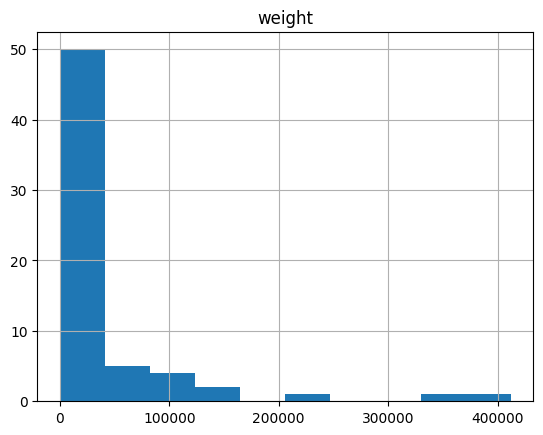

In [310]:
df_network_farma_dm_weight.hist(['weight'])

### Red por pares de medicamentos

In [350]:
df_network_all_farma_dm=freq_cross_farmaco(df_prescripcion_adjencency_matrix_all_22,farma)

In [351]:
df_network_all_farma_dm['weight']=df_network_all_farma_dm['weight']+1

In [353]:
df_network_all_farma_dm['weight'].sum(), df_network_all_farma_dm.shape

(2407539, (1485, 3))

In [354]:
df_network_all_farma_dm_weight=df_network_all_farma_dm[df_network_all_farma_dm.weight!=0]

In [138]:
df_network_all_farma_dm[df_network_all_farma_dm.weight!=0].to_csv('network_grupos_farmacos_all.csv',index=False)

array([[<Axes: title={'center': 'weight'}>]], dtype=object)

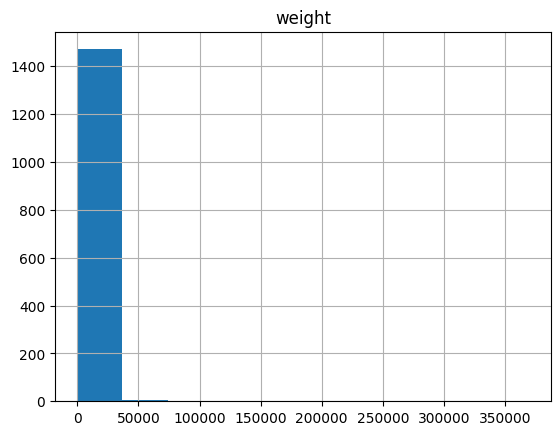

In [356]:
df_network_all_farma_dm_weight.hist(['weight'])

In [574]:
def plot_weighted_graph(df_network, legend):
    "Plot a weighted graph"
    #2. Add nodes
    G = nx.Graph() #Create a graph object called G
    df_network_node_weights=df_network.groupby('ORIGEN').agg({'weight':'sum'}).reset_index()
    df_network_node_weights['weight_norm']=(1000*df_network_node_weights['weight']/df_network_node_weights['weight'].sum())+1
    
    node_list = df_network_node_weights.ORIGEN
    for node in node_list:
        G.add_node(node)
 
    #Note: You can also try a spring_layout
    pos=nx.shell_layout(G) 
    
    #3. If you want, add labels to the nodes
    labels = {}
    for node_name in node_list:
        labels[str(node_name)] =str(node_name)
    nx.draw_networkx_labels(G,pos,labels,font_size=8)

    #for node, w in zip(df_network_node_weights.ORIGEN,df_network_node_weights.weight_norm):
    nx.draw_networkx_nodes(G,pos,node_color='green',node_size=list(df_network_node_weights.weight_norm))
    #4. Add the edges (4C2 = 6 combinations)
    #NOTE: You usually read this data in from some source
    #To keep the example self contained, I typed this out
    for v,t,w in df_network.values:
        G.add_edge(v,t,weight=w) #Karpov vs Kasparov
 
    all_weights = []
    #4 a. Iterate through the graph nodes to gather all the weights
    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
 
    #4 b. Get unique weights
    unique_weights = list(set(all_weights))
    label_options = {"ec": "k", "fc": "white", "alpha": 0.9}
    #4 c. Plot the edges - one by one!
    for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = weight*len(node_list)*3.0/sum(all_weights)
        unique_weights_sort=sorted(unique_weights)
        sum_weights=sum(unique_weights_sort)
        #weighted_edges_label = {(node1,node2):f"{edge_attr['weight']},\n %{str(round(100*edge_attr['weight']/sum_weights,2))}" for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']>=unique_weights_sort[-2]}
        weighted_edges_label = {(node1,node2):f"{edge_attr['weight']}" for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']>=unique_weights_sort[-2]}
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)
        nx.draw_networkx_edge_labels(\
                G, pos,\
                edge_labels=weighted_edges_label,\
                font_color='gray',\
                font_size=5,\
                bbox=label_options)
    
    dict_legend={'group1':'Grupo 1','group2':'Grupo 2','group3':'Grupo 3','group4':'Grupo 4','group5':'Grupo 5','group6':'Grupo 6','group_sd':'Grupo sin clasificar','groups':'Todos los enlaces'}#[legend]
    #nx.draw_networkx(G, node_size=df_network_node_weights.weight_norm.values)
    #Plot the graph
    nx.write_gexf(G, "networks/network_gephi_farmacos_"+legend+".gexf")
    plt.axis('off')
    plt.title('Red de prescripciones por familias de farmacos de DM: '+dict_legend[legend])
    plt.savefig("plots_networks/network_farmacos_L"+legend+".png",dpi=300) 
    plt.show()
    return G

In [ ]:
GLP-1

In [545]:
del df_prescripcion_adjencency_matrix_22['GLP-1']

In [578]:
df_prescripcion_adjencency_matrix_22.value_counts(['GRUPO TERAPEUTICO'])

GRUPO TERAPEUTICO
MONOTERAPIA          1181739
GRUPO 6               405073
SIN DETERMINAR        383686
GRUPO 1               380370
GRUPO 4               330498
GRUPO 2               113296
GRUPO 3                29740
GRUPO 5                11826
dtype: int64

In [605]:
df_network_farma_dm=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22)

In [592]:
df_prescripcion_medicamento_total_compartidas.columns#['Solas (Monoterapia)']

Index(['TIPO', 'Total', 'Compartidas', 'Solas (Monoterapia)'], dtype='object')

In [606]:
df_network_farma_dm.columns#['weight'].sum(), df_prescripcion_medicamento_total_compartidas['Compartidas'].sum()

Index(['ORIGEN', 'DESTINO', 'weight'], dtype='object')

In [607]:
df_network_farma_dm_weight=df_network_farma_dm.merge(df_prescripcion_medicamento_total_compartidas,left_on=['ORIGEN'],right_on=['TIPO'])

In [608]:
df_network_farma_dm_weight.loc[df_network_farma_dm_weight['ORIGEN']==df_network_farma_dm_weight['DESTINO'],'weight']=df_network_farma_dm_weight['Solas (Monoterapia)']

In [609]:
df_network_farma_dm_weight['weight'].sum()

4735867

In [610]:
df_network_farma_dm_weight.iloc[:,:3]

,ORIGEN,DESTINO,weight
0,BIGUANIDA,BIGUANIDA,471928
1,BIGUANIDA,BIGUANIDA/SULFONILUREAS,5
2,BIGUANIDA,GLITAZONA-TIAZOLINDIONAS,92637
3,BIGUANIDA,INHIBIDOR DE ALFA GLUCOSIDASA,18965
4,BIGUANIDA,INHIBIDOR DPP4,234494
...,...,...,...
86,SGLT2,SGLT2/BIGUANIDA,0
87,SGLT2,SULFONILUREA,20880
88,SGLT2/BIGUANIDA,SGLT2/BIGUANIDA,15
89,SGLT2/BIGUANIDA,SULFONILUREA,1


C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_37532\4126325363.py:46: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


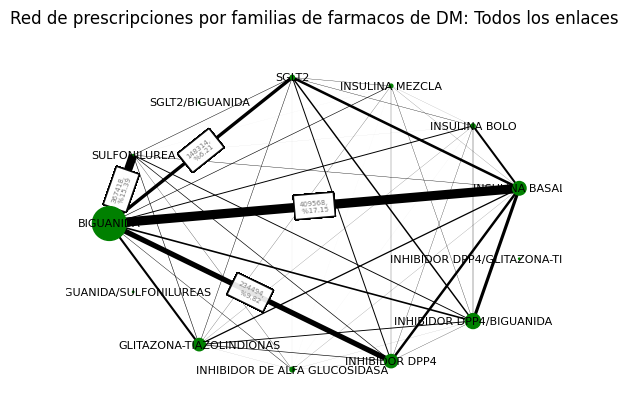

In [546]:
df_network_farma_dm_g1=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22)
G_groups=plot_weighted_graph(df_network_farma_dm_g1,'groups')

C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_37532\4043385353.py:47: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


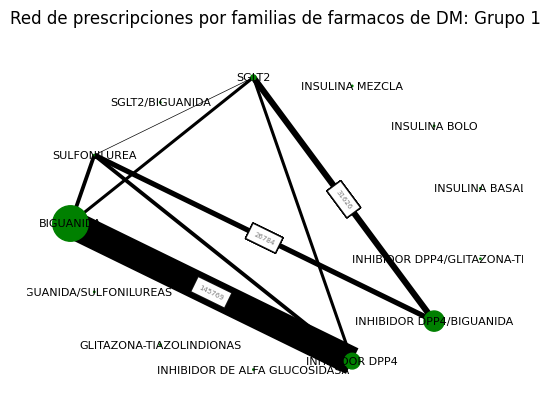

In [565]:
df_network_farma_dm_g1=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22[df_prescripcion_adjencency_matrix_22['GRUPO TERAPEUTICO']=='GRUPO 1'])
G_group=plot_weighted_graph(df_network_farma_dm_g1,'group1')

C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_37532\4043385353.py:47: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


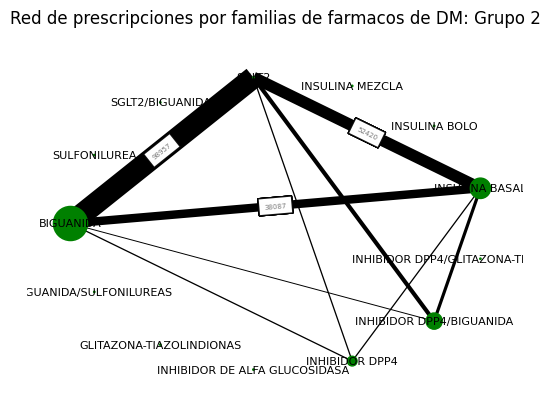

In [566]:
df_network_farma_dm_g2=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22[df_prescripcion_adjencency_matrix_22['GRUPO TERAPEUTICO']=='GRUPO 2'])
G2_group=plot_weighted_graph(df_network_farma_dm_g2,'group2')

C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_37532\1927179492.py:47: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


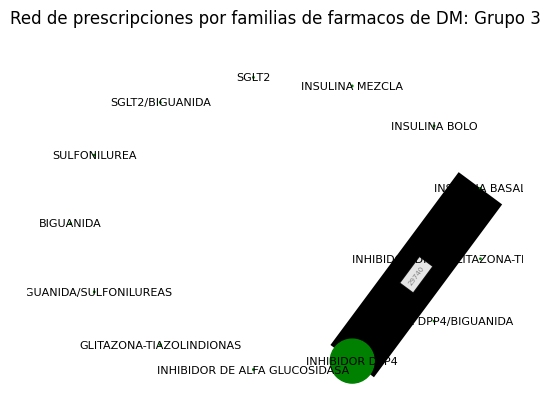

In [569]:
df_network_farma_dm_g3=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22[df_prescripcion_adjencency_matrix_22['GRUPO TERAPEUTICO']=='GRUPO 3'])
G3_group=plot_weighted_graph(df_network_farma_dm_g3,'group3')

C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_37532\587347687.py:47: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


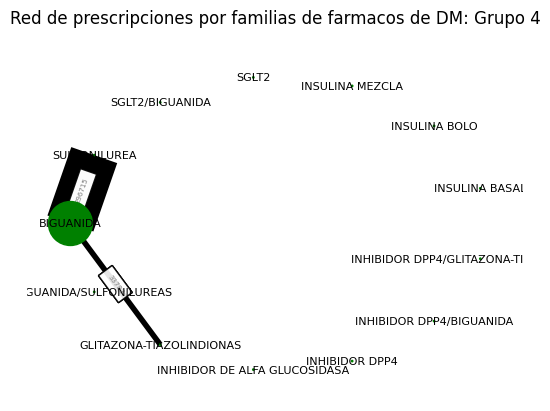

In [571]:
df_network_farma_dm_g4=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22[df_prescripcion_adjencency_matrix_22['GRUPO TERAPEUTICO']=='GRUPO 4'])
G4_group=plot_weighted_graph(df_network_farma_dm_g4,'group4')

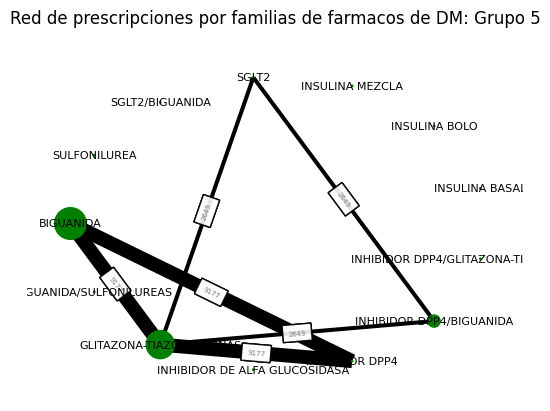

In [575]:
df_network_farma_dm_g5=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22[df_prescripcion_adjencency_matrix_22['GRUPO TERAPEUTICO']=='GRUPO 5'])
G5_group=plot_weighted_graph(df_network_farma_dm_g5,'group5')

C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_37532\587347687.py:47: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


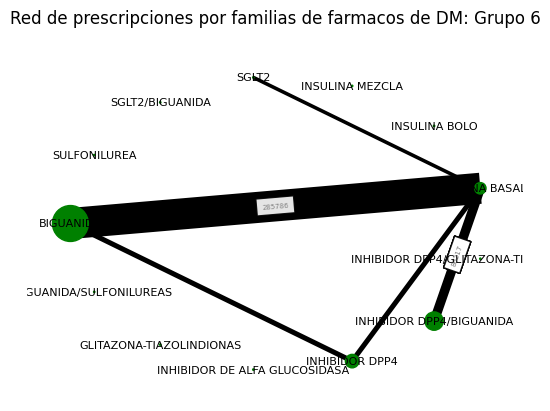

In [576]:
df_network_farma_dm_g6=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22[df_prescripcion_adjencency_matrix_22['GRUPO TERAPEUTICO']=='GRUPO 6'])
G6_group=plot_weighted_graph(df_network_farma_dm_g6,'group6')

C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_37532\161933667.py:43: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


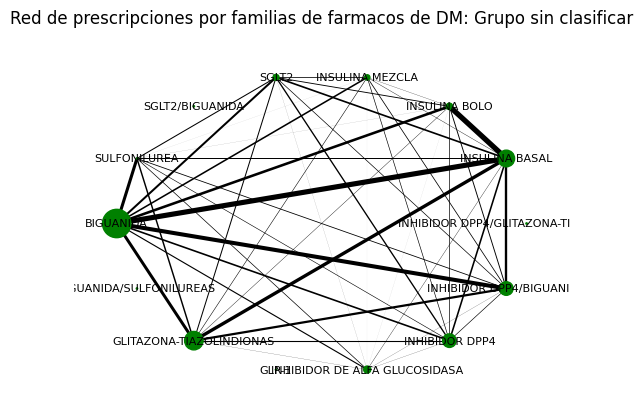

In [466]:
df_network_farma_dm_g_mono=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22[df_prescripcion_adjencency_matrix_22['GRUPO TERAPEUTICO']=='SIN DETERMINAR'])
G_mono_group=plot_weighted_graph(df_network_farma_dm_g_mono,'group_sd')

ZeroDivisionError: float division by zero

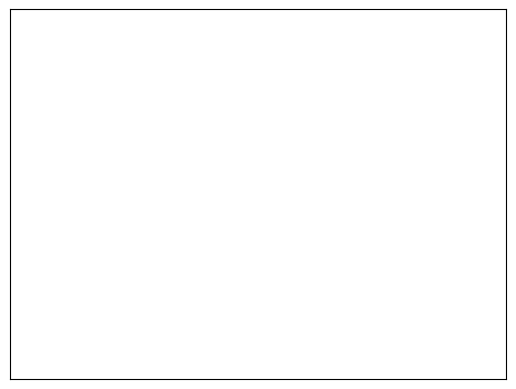

In [465]:
df_network_farma_dm_g_mono=freq_cross_farmaco(df_prescripcion_adjencency_matrix_22[df_prescripcion_adjencency_matrix_22['GRUPO TERAPEUTICO']=='MONOTERAPIA'])
G_mono_group=plot_weighted_graph(df_network_farma_dm_g_mono,'group_mono')

In [424]:
df_network_farma_dm_g_mono

,ORIGEN,DESTINO,weight
0,BIGUANIDA,BIGUANIDA,0
1,BIGUANIDA,BIGUANIDA/SULFONILUREAS,0
2,BIGUANIDA,GLITAZONA-TIAZOLINDIONAS,0
3,BIGUANIDA,GLP-1,0
4,BIGUANIDA,INHIBIDOR DE ALFA GLUCOSIDASA,0
...,...,...,...
100,SGLT2,SGLT2/BIGUANIDA,0
101,SGLT2,SULFONILUREA,0
102,SGLT2/BIGUANIDA,SGLT2/BIGUANIDA,0
103,SGLT2/BIGUANIDA,SULFONILUREA,0


In [423]:
df_prescripcion_adjencency_matrix_22[df_prescripcion_adjencency_matrix_22['GRUPO TERAPEUTICO']=='MONOTERAPIA']

TIPO,BIGUANIDA,BIGUANIDA/SULFONILUREAS,GLITAZONA-TIAZOLINDIONAS,GLP-1,INHIBIDOR DE ALFA GLUCOSIDASA,INHIBIDOR DPP4,INHIBIDOR DPP4/BIGUANIDA,INHIBIDOR DPP4/GLITAZONA-TIAZOLINDIONAS,INSULINA BASAL,INSULINA BOLO,INSULINA MEZCLA,SGLT2,SGLT2/BIGUANIDA,SULFONILUREA,GRUPO TERAPEUTICO
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MONOTERAPIA
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,MONOTERAPIA
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MONOTERAPIA
10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MONOTERAPIA
13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MONOTERAPIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836221,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MONOTERAPIA
2836223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,MONOTERAPIA
2836224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MONOTERAPIA
2836226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,MONOTERAPIA


C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_17440\3956788104.py:43: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


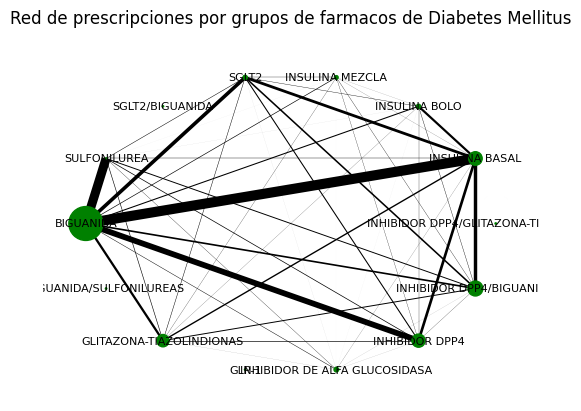

In [333]:
G_group=plot_weighted_graph(df_network_farma_dm,'group')

In [341]:
df_network_farma_dm_weight_sort=df_network_farma_dm.sort_values(['weight'], ascending=False)

In [342]:
df_network_farma_dm_weight_sort_=df_network_farma_dm_weight_sort[df_network_farma_dm_weight_sort['ORIGEN']!=df_network_farma_dm_weight_sort['DESTINO']]

In [343]:
df_network_farma_dm_weight_sort_['index']=range(1,df_network_farma_dm_weight_sort_.shape[0]+1)

C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_17440\2745182587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_farma_dm_weight_sort_['index']=range(1,df_network_farma_dm_weight_sort_.shape[0]+1)


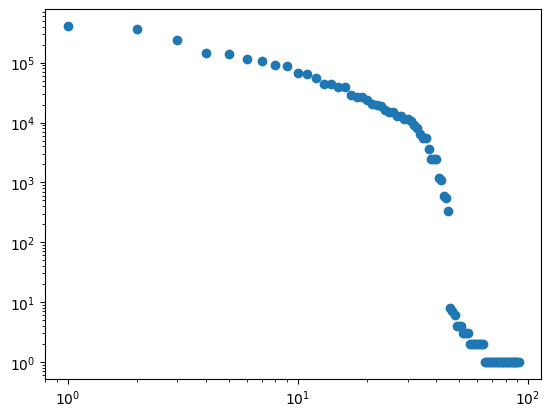

In [346]:
plt.scatter(df_network_farma_dm_weight_sort_['index'],df_network_farma_dm_weight_sort_['weight'])
plt.xscale('log')
plt.yscale('log')

C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_17440\3956788104.py:43: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


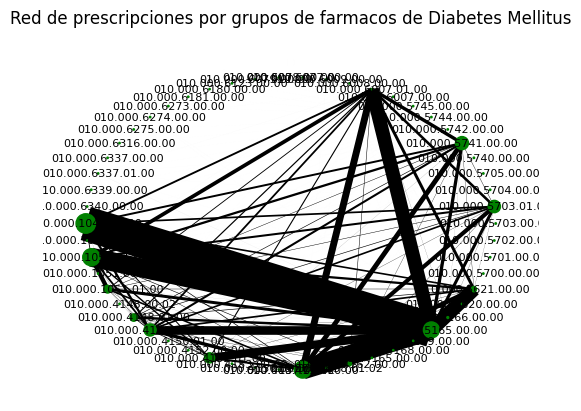

In [357]:
plot_weighted_graph(df_network_all_farma_dm_weight, 'all_med')

In [358]:
df_network_all_farma_dm_weight_sort=df_network_all_farma_dm_weight.sort_values(['weight'],ascending=False)

In [360]:
df_network_all_farma_dm_weight_sort_=df_network_all_farma_dm_weight_sort[df_network_all_farma_dm_weight_sort['ORIGEN']!=df_network_all_farma_dm_weight_sort['DESTINO']]

In [361]:
df_network_all_farma_dm_weight_sort_['index']=range(1,df_network_all_farma_dm_weight_sort_.shape[0]+1)

C:\Users\jorge.hernandezcas\AppData\Roaming\MobaXterm\slash\tmp\ipykernel_17440\2800670481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_all_farma_dm_weight_sort_['index']=range(1,df_network_all_farma_dm_weight_sort_.shape[0]+1)


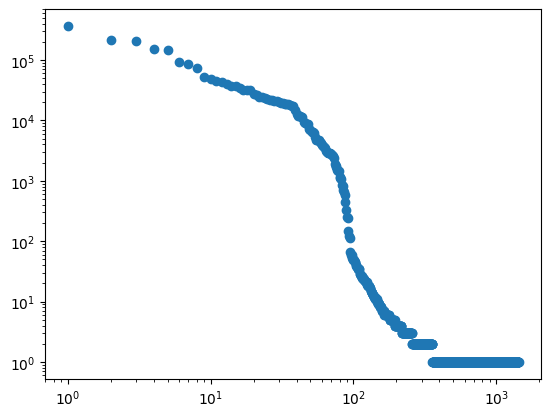

In [362]:
plt.scatter(df_network_all_farma_dm_weight_sort_['index'],df_network_all_farma_dm_weight_sort_['weight'])
plt.xscale('log')
plt.yscale('log')